# UTS




Lakukan analisa terhadap data pada https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi
- metode KNN
- metode pohon keputusan (Desision tree)

Import semua library

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

Ambil Dataset

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")

Melihat informasi kolom beserta datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


Melihat isi 5 baris dari atas

In [ ]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Melihat jumlah baris dan kolom

In [ ]:
data.shape

(116, 10)

Melihat semua nama fitur

In [ ]:
 data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

Mengambil data tes yang disimpan di variabel X dan mengambil data label untuk disimpan di variable y

In [ ]:

# create the features from data
X = data.drop(columns="Classification")
# CREATE CLASSIFICATION
y = data["Classification"]

Melakukan splitting data untk mengambil data uji dengan data latih

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3, random_state=50)

# Klasifikasi dengan metode KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Membuat k 1 sampai 25
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(xtrain,ytrain)
        y_pred=knn.predict(xtest)
        scores[k] = metrics.accuracy_score(ytest,y_pred)
        scores_list.append(metrics.accuracy_score(ytest,y_pred))

Mengecek nilai akurasi dari semua K

In [ ]:
scores

{1: 0.6571428571428571,
 2: 0.5714285714285714,
 3: 0.5428571428571428,
 4: 0.6571428571428571,
 5: 0.5714285714285714,
 6: 0.6,
 7: 0.5714285714285714,
 8: 0.6,
 9: 0.5714285714285714,
 10: 0.5428571428571428,
 11: 0.5714285714285714,
 12: 0.5142857142857142,
 13: 0.5428571428571428,
 14: 0.5142857142857142,
 15: 0.5428571428571428,
 16: 0.4857142857142857,
 17: 0.5428571428571428,
 18: 0.5142857142857142,
 19: 0.5714285714285714,
 20: 0.5428571428571428,
 21: 0.6,
 22: 0.5428571428571428,
 23: 0.6285714285714286,
 24: 0.6,
 25: 0.5428571428571428}

Membuat visualisasi dari semua tes akurasi

Text(0, 0.5, 'Testing Accuracy')

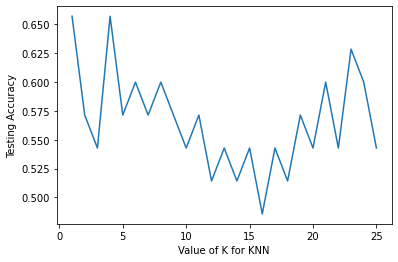

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Bisa terlihat dari grafik diatas nilai akurasi terbaik berada di K=4 maka dengan ini kita ambil nilai K=4 untuk tes data uji

In [ ]:
#Set nilai K=4 untuk data uji
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=4)

Proses Pengujian dengan 2 data uji

In [ ]:

classes = {1:'Healthy controls',2:'Patiens'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[25,112,7,7,0.5,15,30,3,380],
         [75,30,152,7,2.6,50.5,10,11,198]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

Healthy controls
Patiens


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Dari 2 data uji yang saya coba didapatkan data uji pertama menghasilkan label "Healty controls" sedangkan data uji kedua menghasilkan label "Patiens"

# Klasifikasi dengan metode Decision Tree

Pembuatan decision tree

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
# Create DecisionTree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(xtrain, ytrain)

Visualisasi pohon keputusan

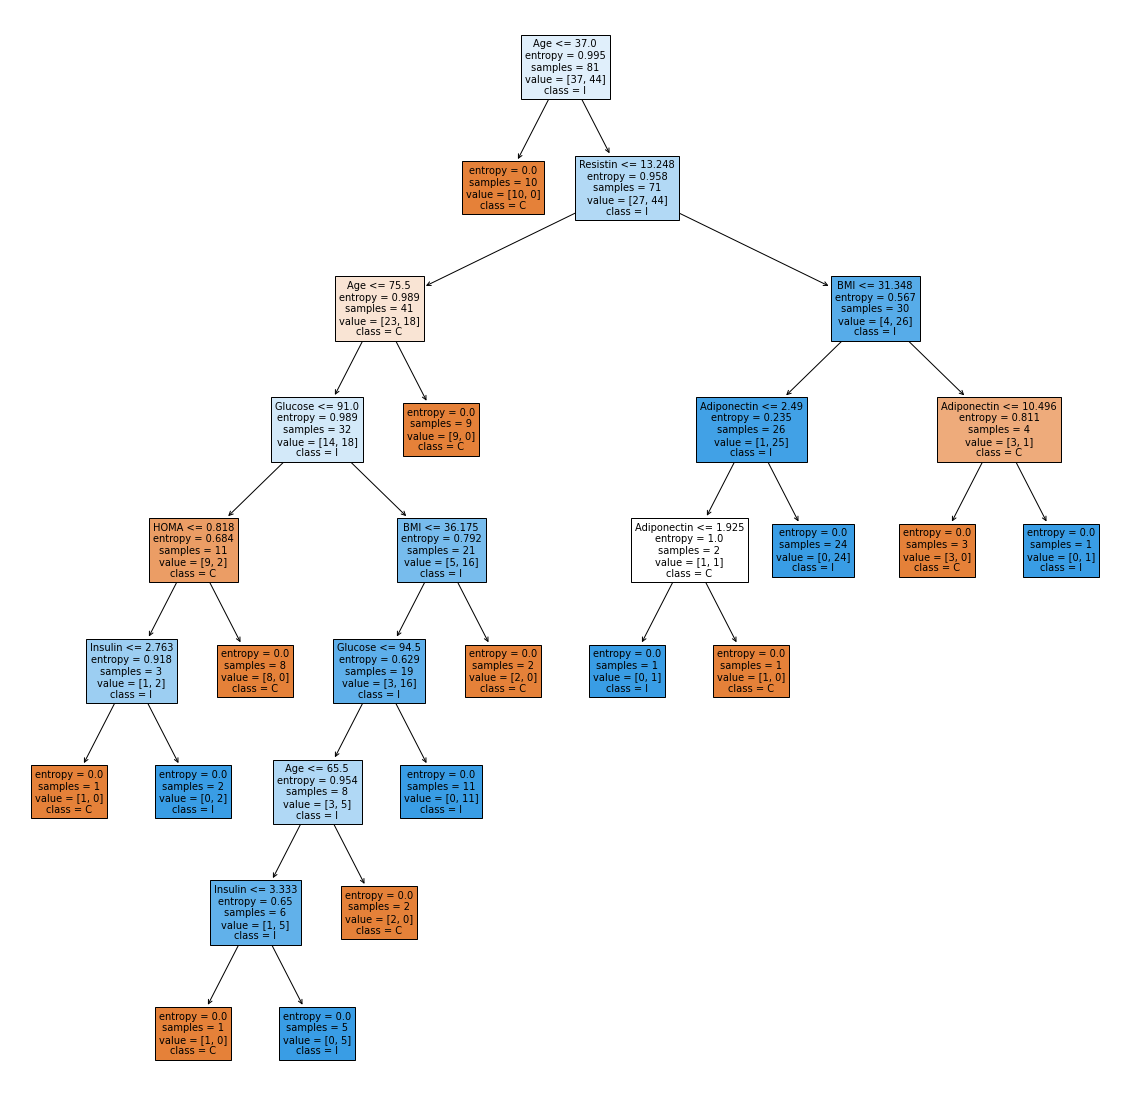

In [ ]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9] ,filled=True)

In [ ]:
print("Score data latih :", clf_tree.score(xtrain, ytrain))
print("Score data uji   :", clf_tree.score(xtest, ytest))

Score data latih : 1.0
Score data uji   : 0.6857142857142857
